In [12]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

dataDir = Path.cwd().parent.parent/'Data/processed'
usecols = ['id', 'Gigacow_Cow_Id', 'BreedName', 'label']

learner_dataset = pd.read_csv(dataDir/"Cow_Learner_dataset_L1_1500.csv", index_col="id", usecols=usecols)
learner_dataset.drop_duplicates(subset=['Gigacow_Cow_Id'], inplace=True)

memory_dataset = pd.read_csv(dataDir/"memory_targetCows/cow_total/Cow_Memory_dataset_L1_L2.csv", index_col="id", usecols=usecols)
memory_dataset.drop_duplicates(subset=['Gigacow_Cow_Id'], inplace=True)

#analysis on memory&learner problem
memory_list = [769, 3718, 5147, 2844, 1181, 5160, 4008, 1985, 74, 1738, 2382, 1103, 4176, 5844, 5848, 5465, 5211, 478, 5088, 5092, 2278, 1905, 5235, 3447]
learner_list = [2560, 3075, 2569, 4109, 3603, 1555, 5147, 3613, 544, 550, 5160, 2090, 3638, 3657, 74, 1103, 4176, 2135, 6235, 4704, 6241, 4195, 4200, 622, 5235, 3705, 3707, 645, 2694, 5767, 3718, 2702, 151, 6300, 4765, 1181, 3744, 2724, 1705, 6316, 3762, 5301, 182, 4280, 4792, 708, 4295, 5322, 2251, 1738, 1744, 5844, 5846, 4311, 5848, 6360, 1244, 5852, 2278, 2792, 6380, 5873, 2805, 5372, 1277, 769, 1796, 2844, 6434, 4899, 3890, 1336, 2374, 6472, 4939, 5965, 855, 5465, 1905, 3446, 3447, 2423, 4988, 4990, 385, 6018, 3979, 2956, 6039, 2460, 5534, 3487, 926, 2466, 2979, 4525, 943, 5555, 5046, 951, 4537, 961, 1985, 6086, 4038, 2510, 5076, 2517, 985, 478, 5088, 5092, 3563, 2031, 6127, 5616, 2039, 2047]

association_cow_list = list(set(memory_list) & set(learner_list))

In [78]:
# save a list of cow data for learner problems 
cow_dict = dict()
learner_list = []
memory_list = []

for i, cow_id in enumerate(association_cow_list):
    learner_label = int(learner_dataset.loc[learner_dataset.Gigacow_Cow_Id == cow_id].label)
    memory_label = int(memory_dataset.loc[memory_dataset.Gigacow_Cow_Id == cow_id].label)
    learner_list.append(learner_label)
    memory_list.append(memory_label)
    cow_dict[cow_id] = str(learner_label)+str(memory_label)

print("num of cows: ", len(cow_dict))
print("info: ", cow_dict)

# collection the key-value pairs from the cow dict
collection_labels = list(cow_dict.values())
labels = list(Counter(collection_labels).keys())
num = list(Counter(collection_labels).values())
print("The label of cow dict: ", labels)
print("The amount of labels: ", num)
# map the label with explainable text
names = {'10':"Fast learner with bad memory", '11':"Fast learner with good memory", '01':"Slow learner with good memory", '00':"Slow learner with bad memory"}
labels = [x if x not in names else names[x] for x in names]
print(labels)

num of cows:  21
info:  {769: '10', 3718: '11', 5147: '11', 2844: '01', 1181: '11', 5160: '10', 1985: '10', 74: '10', 1738: '10', 1103: '10', 4176: '00', 5844: '01', 5848: '01', 5465: '10', 478: '11', 5088: '11', 5092: '10', 2278: '10', 1905: '10', 5235: '10', 3447: '10'}
The label of cow dict:  ['10', '11', '01', '00']
The amount of labels:  [12, 5, 3, 1]
['Fast learner with bad memory', 'Fast learner with good memory', 'Slow learner with good memory', 'Slow learner with bad memory']


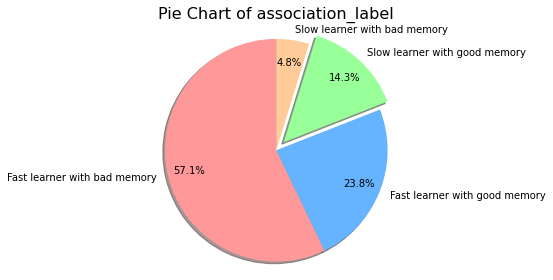

In [82]:
# plot the consist of labels

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(num, colors = colors, startangle=90, 
        explode=[0, 0, 0.1, 0], labels=labels,
        shadow=True, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
ax1.axis('equal')

#plt.legend(fontsize=12)
plt.title("Pie Chart of association_label", fontsize=16)
plt.tight_layout()

plt.show()